In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read csv file and import data.
df=pd.read_csv("/Users/jinlinchen/Documents/Study/HWR Berlin/Data Science/Data Science Project/Dataset_Hospital_Visits.csv")

# 3.Exploratory Data Analysis

In [3]:
# Showing information of the dataframe (Which columns are included; Numbers of non-null for each column; Data type)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88421 entries, 0 to 88420
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientId        88421 non-null  float64
 1   AppointmentID    88421 non-null  int64  
 2   Sex              88421 non-null  object 
 3   ScheduledDate    88421 non-null  object 
 4   AppointmentDate  88421 non-null  object 
 5   Age              79614 non-null  float64
 6   Community        77708 non-null  object 
 7   SocialWelfare    75902 non-null  object 
 8   Hipertension     80400 non-null  object 
 9   Diabetes         88421 non-null  object 
 10  Alcoholism       73532 non-null  object 
 11  Handcap          88421 non-null  object 
 12  SMS_received     88421 non-null  object 
 13  No-show          88421 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 9.4+ MB


In [4]:
# Provide statistics of the dataframe
df.describe()

PatientId  AppointmentID           Age
count  8.842100e+04   8.842100e+04  79614.000000
mean   1.485355e+14   5.675199e+06     37.067903
std    2.572424e+14   7.145639e+04     23.140942
min    3.921784e+04   5.030230e+06      0.000000
25%    4.194616e+12   5.640214e+06     18.000000
50%    3.189960e+13   5.680520e+06     37.000000
75%    9.465347e+13   5.725486e+06     55.000000
max    9.999816e+14   5.790484e+06    115.000000

In [5]:
# Check for duplicated values. 
# In this data frame there is 0 duplicated value.
print(df.duplicated().sum())

0


In [6]:
# Showing how many null values each column contains
print("Initial length:", len(df), "rows")
print(df.isnull().sum())

Initial length: 88421 rows
PatientId              0
AppointmentID          0
Sex                    0
ScheduledDate          0
AppointmentDate        0
Age                 8807
Community          10713
SocialWelfare      12519
Hipertension        8021
Diabetes               0
Alcoholism         14889
Handcap                0
SMS_received           0
No-show                0
dtype: int64


In [7]:
# Change data type of a column 
# Patient Id is changed from float to integer as integer is a more appropriate data type for patient id. 
# Scheduled date and Appointment Date are changed from object to data type of date time, as object is the wrong data type and date time is easier for calculation in the following steps.
df['PatientId']=df['PatientId'].astype(int)
# use imputer and fit df['Age'] = df['Age'].fillna(0).astype(int) ???
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate'])
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'])


# Check current data type of each column and show first 5 rows of the dataframe
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88421 entries, 0 to 88420
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   PatientId        88421 non-null  int64              
 1   AppointmentID    88421 non-null  int64              
 2   Sex              88421 non-null  object             
 3   ScheduledDate    88421 non-null  datetime64[ns, UTC]
 4   AppointmentDate  88421 non-null  datetime64[ns, UTC]
 5   Age              79614 non-null  float64            
 6   Community        77708 non-null  object             
 7   SocialWelfare    75902 non-null  object             
 8   Hipertension     80400 non-null  object             
 9   Diabetes         88421 non-null  object             
 10  Alcoholism       73532 non-null  object             
 11  Handcap          88421 non-null  object             
 12  SMS_received     88421 non-null  object             
 13  No-show         

PatientId  AppointmentID Sex             ScheduledDate  \
0  47385269248944        5387604   F 2016-02-24 07:53:17+00:00   
1  65574946592538        5655266   M 2016-05-03 16:29:14+00:00   
2    126547271323        5745855   F 2016-05-30 12:54:18+00:00   
3  26817685826777        5700247   F 2016-05-16 09:15:51+00:00   
4  78135651893663        5656211   F 2016-05-04 07:46:23+00:00   

            AppointmentDate   Age          Community SocialWelfare  \
0 2016-05-13 00:00:00+00:00   NaN        RESISTÊNCIA            no   
1 2016-05-12 00:00:00+00:00   4.0                NaN           NaN   
2 2016-05-30 00:00:00+00:00  19.0    JARDIM DA PENHA            no   
3 2016-05-16 00:00:00+00:00  55.0  JESUS DE NAZARETH            no   
4 2016-05-04 00:00:00+00:00   0.0            ITARARÉ           NaN   

  Hipertension Diabetes Alcoholism Handcap SMS_received No-show  
0           no       no         no      no           no      No  
1          NaN       no         no      no           no      No  
2           no       no         no      no           no      No  
3          yes       no         no      no           no      No  
4           no       no         no      no           no      No

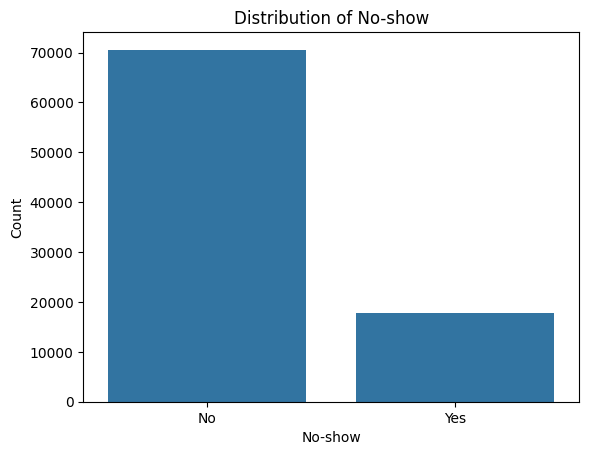

In [8]:
# Showing the distribution of no show with a histogram because... it shows...
sns.countplot(data=df, x="No-show")
plt.title("Distribution of No-show")
plt.xlabel("No-show")
plt.ylabel("Count")
plt.show()

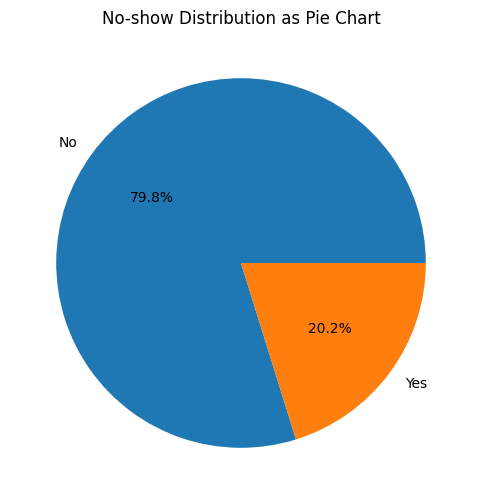

In [9]:
#Showing the distribution with a pie chart. It shows what percentage of the total number of patient were not showing up. 
no_show_counts = df['No-show'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(no_show_counts, labels=no_show_counts.index,autopct='%1.1f%%')
plt.title("No-show Distribution as Pie Chart")
plt.show()

<Axes: title={'center': 'Relation between Waiting Time and No Show (Counts)'}, xlabel='No-show', ylabel='Waiting_Time_Categorized'>

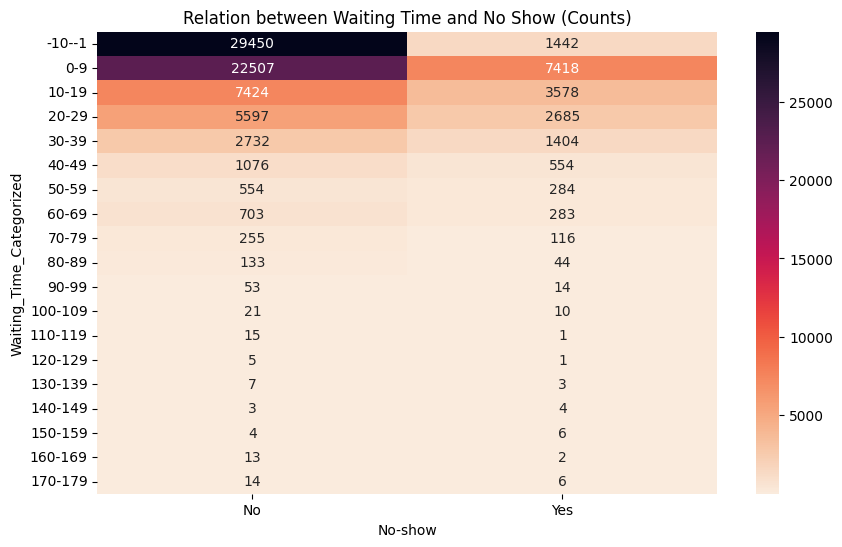

In [10]:
# Showing relation between waiting time (appointment date - scheduled date) and no show with a heatmap. 
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate'])
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'])
df['WaitingTime'] = (df['AppointmentDate'] - df['ScheduledDate']).dt.days

# Categorize waiting time into bins of 10 days
max_waiting_time = df['WaitingTime'].max()
min_waiting_time = df['WaitingTime'].min()
waiting_time_bins = np.arange(-10, max_waiting_time+10,10)
waiting_time_labels = [f"{i}-{i+9}" for i in waiting_time_bins[:-1]]
df['Waiting_Time_Categorized'] = pd.cut(df['WaitingTime'], bins=waiting_time_bins, labels=waiting_time_labels, right=False)

wt_hm_counts = df.pivot_table(index='Waiting_Time_Categorized', columns='No-show', aggfunc='size',fill_value=0)

plt.figure(figsize=(10,6))
plt.title('Relation between Waiting Time and No Show (Counts)')
sns.heatmap(wt_hm_counts, annot=True, cmap = sns.cm.rocket_r, fmt='g')



In [11]:
# Convert counts to percentages
wt_hm_percentage = wt_hm_counts.div(wt_hm_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
plt.title('Relation between Waiting Time and No Show (Percentage)')
sns.heatmap(wt_hm_percentage, annot=True, cmap=sns.cm.rocket_r, fmt='.1f')

This histogram illustrates the differences in patient no-show rates based on whether they received an SMS reminder for their appointment

SyntaxError: invalid syntax (3477195466.py, line 8)

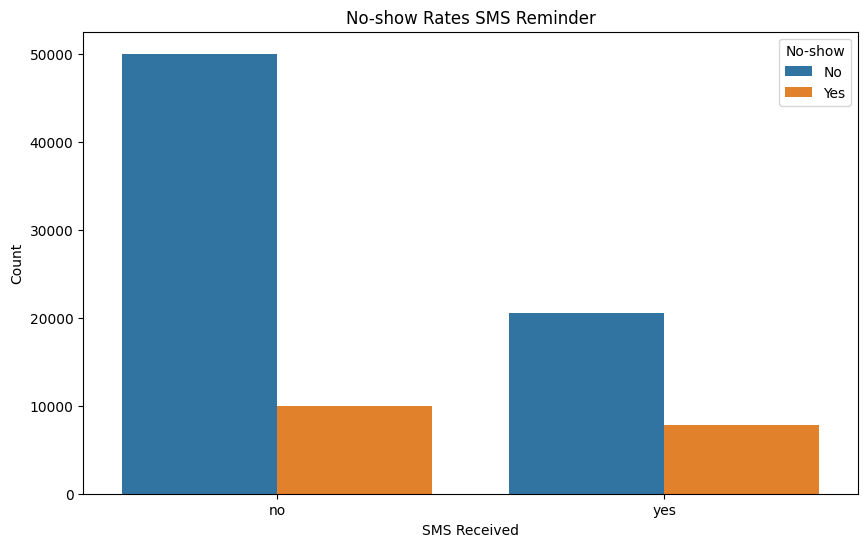

In [12]:
# Using a histogram to illustrate the differences in patient no-show rates 
#based on whether they received an SMS reminder for their appointment.

!!! add percentage as well !!!!

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SMS_received', hue='No-show')
plt.title('No-show Rates SMS Reminder')
plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.show()

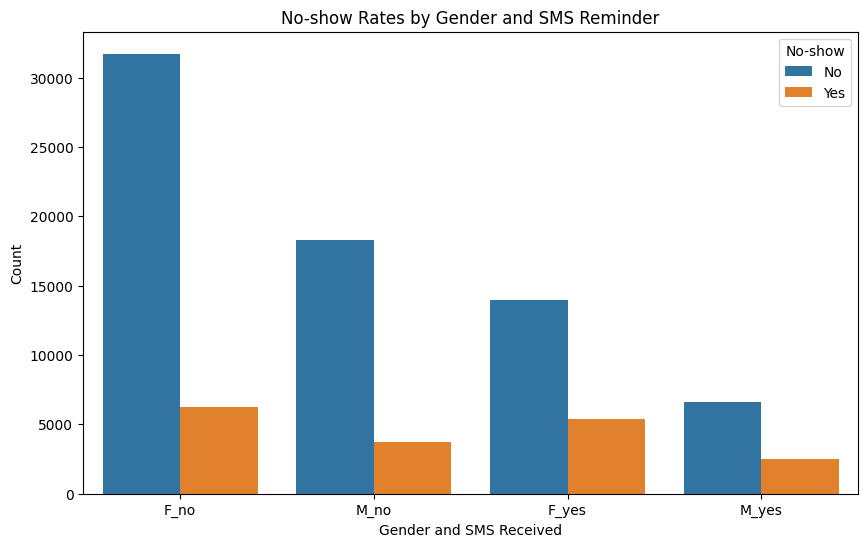

In [13]:
# Using a histogram to illustrate the differences in patient no-show rates 
#based on whether they received an SMS reminder for their appointment and the gender.


# Create a new column combining Gender and SMS_received
df['Gender_SMS'] = df['Sex'] + "_" + df['SMS_received']

# Countplot with hue for No-show
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender_SMS', hue='No-show')
plt.title('No-show Rates by Gender and SMS Reminder')
plt.xlabel('Gender and SMS Received')
plt.ylabel('Count')
plt.show()

# how to change f_no to f_no_sms_reveibed ...???


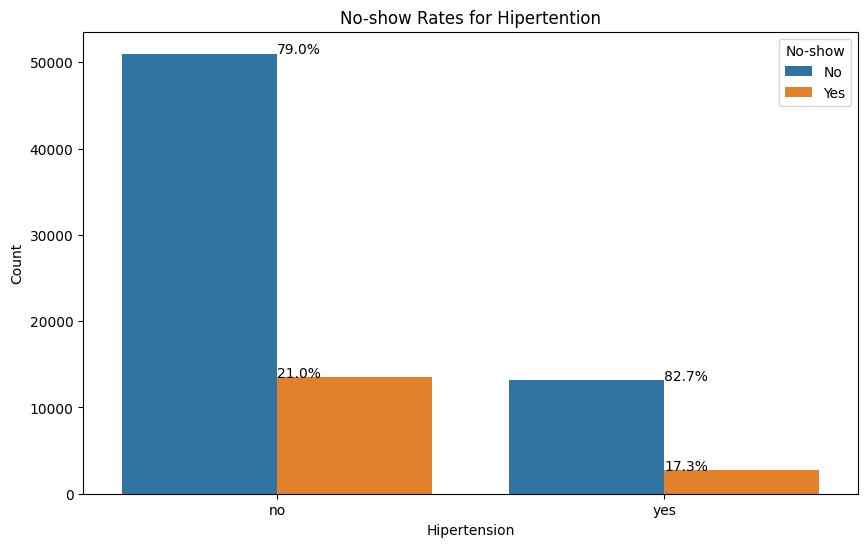

In [14]:
# Using a histogram to illustrate the differences in patient no-show rates 
#based on patients' body condition (Hipertention, Diabetes, Alcoholism, Handicap).

df_condition = df[['No-show','Hipertension','Diabetes','Alcoholism','Handcap']]

plt.figure(figsize=(10, 6))
hipertention_cp= sns.countplot(data=df_condition, x= 'Hipertension', hue='No-show')
plt.title('No-show Rates for Hipertention')
plt.xlabel('Hipertension')
plt.ylabel('Count')


total = len(df_condition)
hipertention_counts = df.groupby(['Hipertension', 'No-show']).size().unstack(fill_value=0)
percentages = hipertention_counts.div(hipertention_counts.sum(axis=1), axis=0) * 100

for i in range(len(hipertention_counts)):
    for j in range(len(hipertention_counts.columns)):
        count = hipertention_counts.iloc[i, j]
        percentage = percentages.iloc[i, j]
        hipertention_cp.text(i, count, f'{percentage:.1f}%')

plt.show()

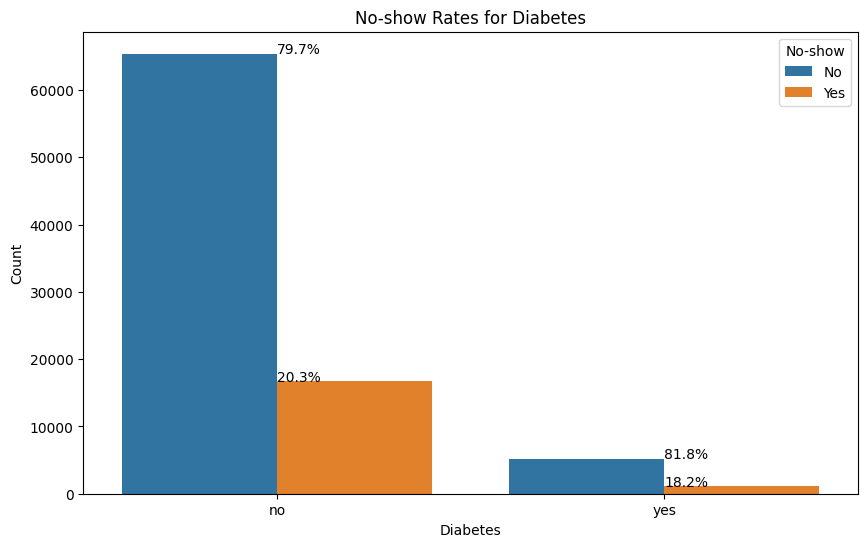

In [15]:
df_condition = df[['No-show','Hipertension','Diabetes','Alcoholism','Handcap']]

plt.figure(figsize=(10, 6))
Diabetes_cp= sns.countplot(data=df_condition, x= 'Diabetes', hue='No-show')
plt.title('No-show Rates for Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')


total = len(df_condition)
Diabetes_counts = df.groupby(['Diabetes', 'No-show']).size().unstack(fill_value=0)
percentages = Diabetes_counts.div(Diabetes_counts.sum(axis=1), axis=0) * 100

for i in range(len(Diabetes_counts)):
    for j in range(len(Diabetes_counts.columns)):
        count = Diabetes_counts.iloc[i, j]
        percentage = percentages.iloc[i, j]
        Diabetes_cp.text(i, count, f'{percentage:.1f}%')

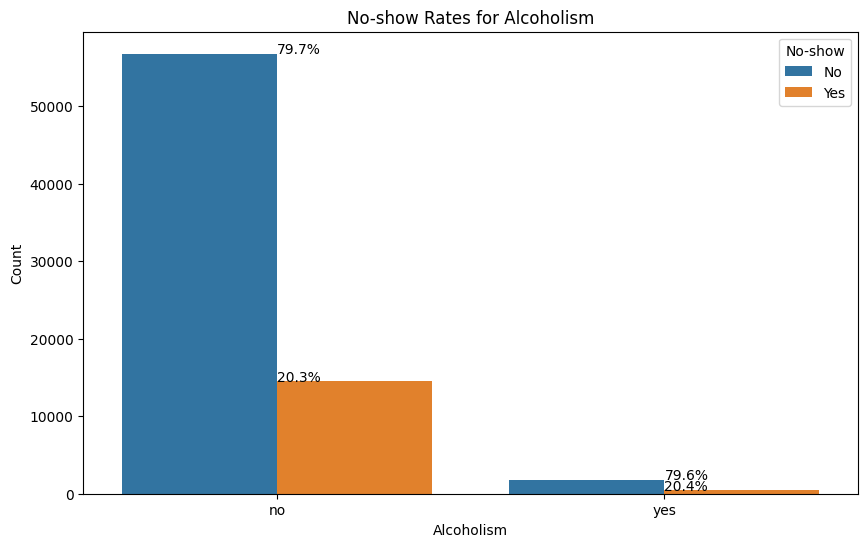

In [16]:
plt.figure(figsize=(10, 6))
Alcoholism_cp= sns.countplot(data=df_condition, x= 'Alcoholism', hue='No-show')
plt.title('No-show Rates for Alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('Count')


total = len(df_condition)
Alcoholism_counts = df.groupby(['Alcoholism', 'No-show']).size().unstack(fill_value=0)
percentages = Alcoholism_counts.div(Alcoholism_counts.sum(axis=1), axis=0) * 100

for i in range(len(Alcoholism_counts)):
    for j in range(len(Alcoholism_counts.columns)):
        count = Alcoholism_counts.iloc[i, j]
        percentage = percentages.iloc[i, j]
        Alcoholism_cp.text(i, count, f'{percentage:.1f}%')

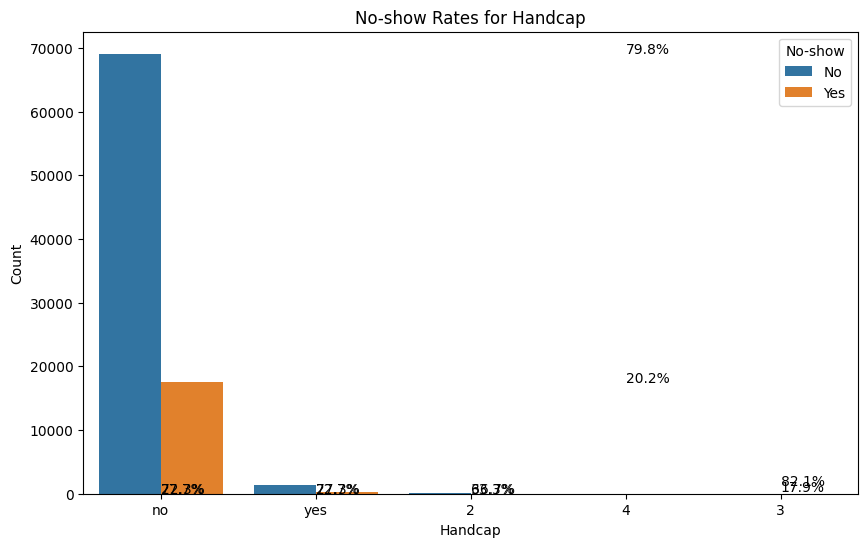

In [17]:
df_condition = df[['No-show','Hipertension','Diabetes','Alcoholism','Handcap']]

plt.figure(figsize=(10, 6))
Handcap_cp= sns.countplot(data=df_condition, x= 'Handcap', hue='No-show')
plt.title('No-show Rates for Handcap')
plt.xlabel('Handcap')
plt.ylabel('Count')


total = len(df_condition)
Handcap_counts = df.groupby(['Handcap', 'No-show']).size().unstack(fill_value=0)
percentages = Handcap_counts.div(Handcap_counts.sum(axis=1), axis=0) * 100

for i in range(len(Handcap_counts)):
    for j in range(len(Handcap_counts.columns)):
        count = Handcap_counts.iloc[i, j]
        percentage = percentages.iloc[i, j]
        Handcap_cp.text(i, count, f'{percentage:.1f}%')

# 4. Data Preparation

In [18]:
# Showing information of the dataframe (Which columns are included; Numbers of non-null for each column; Data type)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88421 entries, 0 to 88420
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   PatientId                 88421 non-null  int64              
 1   AppointmentID             88421 non-null  int64              
 2   Sex                       88421 non-null  object             
 3   ScheduledDate             88421 non-null  datetime64[ns, UTC]
 4   AppointmentDate           88421 non-null  datetime64[ns, UTC]
 5   Age                       79614 non-null  float64            
 6   Community                 77708 non-null  object             
 7   SocialWelfare             75902 non-null  object             
 8   Hipertension              80400 non-null  object             
 9   Diabetes                  88421 non-null  object             
 10  Alcoholism                73532 non-null  object             
 11  Handcap        

In [19]:
# Changing data type of scheduled date and appointment date to float for the following correlation analysis
df['ScheduledDate'] = df['ScheduledDate'].apply(lambda x: x.timestamp())
df['AppointmentDate'] = df['AppointmentDate'].apply(lambda x: x.timestamp())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88421 entries, 0 to 88420
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   PatientId                 88421 non-null  int64   
 1   AppointmentID             88421 non-null  int64   
 2   Sex                       88421 non-null  object  
 3   ScheduledDate             88421 non-null  float64 
 4   AppointmentDate           88421 non-null  float64 
 5   Age                       79614 non-null  float64 
 6   Community                 77708 non-null  object  
 7   SocialWelfare             75902 non-null  object  
 8   Hipertension              80400 non-null  object  
 9   Diabetes                  88421 non-null  object  
 10  Alcoholism                73532 non-null  object  
 11  Handcap                   88421 non-null  object  
 12  SMS_received              88421 non-null  object  
 13  No-show                   88421 non-null  obje

In [21]:
# Defining all the potential features for the training (left out appointment id, scheduled date)
#! maybe add scheduled date as well !
features= ['PatientId','Sex','AppointmentDate','Age','Community','SocialWelfare','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','WaitingTime']
df_subset=df[['PatientId','Sex','AppointmentDate','Age','Community','SocialWelfare','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','WaitingTime','No-show']]

In [22]:
print("Initial length:", len(df), "rows")
print(df.isnull().sum())

Initial length: 88421 rows
PatientId                       0
AppointmentID                   0
Sex                             0
ScheduledDate                   0
AppointmentDate                 0
Age                          8807
Community                   10713
SocialWelfare               12519
Hipertension                 8021
Diabetes                        0
Alcoholism                  14889
Handcap                         0
SMS_received                    0
No-show                         0
WaitingTime                     0
Waiting_Time_Categorized        0
Gender_SMS                      0
dtype: int64


In [23]:
df.describe()
# Age median


PatientId  AppointmentID  ScheduledDate  AppointmentDate  \
count  8.842100e+04   8.842100e+04   8.842100e+04     8.842100e+04   
mean   1.485355e+14   5.675199e+06   1.462778e+09     1.463620e+09   
std    2.572424e+14   7.145639e+04   1.656374e+06     1.052923e+06   
min    3.921700e+04   5.030230e+06   1.447140e+09     1.461888e+09   
25%    4.194616e+12   5.640214e+06   1.461925e+09     1.462752e+09   
50%    3.189960e+13   5.680520e+06   1.462882e+09     1.463530e+09   
75%    9.465347e+13   5.725486e+06   1.463743e+09     1.464653e+09   
max    9.999816e+14   5.790484e+06   1.465416e+09     1.465344e+09   

                Age   WaitingTime  
count  79614.000000  88421.000000  
mean      37.067903      9.213841  
std       23.140942     15.311339  
min        0.000000     -7.000000  
25%       18.000000     -1.000000  
50%       37.000000      3.000000  
75%       55.000000     14.000000  
max      115.000000    178.000000

In [24]:
# Changes output of the transformers to Pandas
from sklearn import set_config
set_config(transform_output="pandas")

# import the imputing function
from sklearn.impute import SimpleImputer

In [25]:
# Defining 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
imputer_mean = SimpleImputer(strategy="mean")
imputer_median = SimpleImputer(strategy="median")
imputer_mode = SimpleImputer(strategy="most_frequent")
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

from sklearn.compose import ColumnTransformer
ct_mv = ColumnTransformer(
    [
        ('imputer_median', imputer_median, ['Age']),
        ('imputer_mode', imputer_mode, ['Community', 'SocialWelfare', 'Hipertension','Alcoholism']),
        ('ohe', ohe, ['Sex', 'Community', 'SocialWelfare', 'Hipertension','Diabetes','Alcoholism','Handcap','SMS_received'])
    ],
    remainder='passt

In [27]:
from sklearn.compose import ColumnTransformer
# This column transform replaces all null value and transforms object to float. 
ct = ColumnTransformer(
    [
        ('imputer_median', imputer_median, ['Age']),
        ('imputer_mode', imputer_mode, ['Community', 'SocialWelfare', 'Hipertension','Alcoholism']),
        ('ohe', ohe, ['Sex', 'Community', 'SocialWelfare', 'Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No-show'])
    ],
    remainder='passthrough'
)

# Column transform without column no show (no show is object)
ct_wo_noshow = ColumnTransformer(
    [
        ('imputer_median', imputer_median, ['Age']),
        ('imputer_mode', imputer_mode, ['Community', 'SocialWelfare', 'Hipertension','Alcoholism']),
        ('ohe', ohe, ['Sex', 'Community', 'SocialWelfare', 'Hipertension','Diabetes','Alcoholism','Handcap','SMS_received'])
    ],
    remainder='passthrough'
)


In [28]:
t_df_subset_noshow=ct_wo_noshow.fit_transform(df_subset)
t_df_subset_noshow = t_df_subset_noshow.drop(columns=['imputer_mode__Community', 'imputer_mode__SocialWelfare', 'imputer_mode__Hipertension', 'imputer_mode__Alcoholism'])

In [31]:
t_df_subset=ct.fit_transform(df_subset)
t_df_subset


imputer_median__Age imputer_mode__Community  \
0                     37.0             RESISTÊNCIA   
1                      4.0          JARDIM CAMBURI   
2                     19.0         JARDIM DA PENHA   
3                     55.0       JESUS DE NAZARETH   
4                      0.0                 ITARARÉ   
...                    ...                     ...   
88416                 32.0              TABUAZEIRO   
88417                  7.0          JARDIM CAMBURI   
88418                 50.0             MARIA ORTIZ   
88419                 39.0            PRAIA DO SUÁ   
88420                 48.0             JOANA D´ARC   

      imputer_mode__SocialWelfare imputer_mode__Hipertension  \
0                              no                         no   
1                              no                         no   
2                              no                         no   
3                              no                        yes   
4                              no                         no   
...                           ...                        ...   
88416                          no                         no   
88417                          no                         no   
88418                          no                         no   
88419                          no                         no   
88420                          no                         no   

      imputer_mode__Alcoholism  ohe__Sex_F  ohe__Sex_M  \
0                           no         1.0         0.0   
1                           no         0.0         1.0   
2                           no         1.0         0.0   
3                           no         1.0         0.0   
4                           no         1.0         0.0   
...                        ...         ...         ...   
88416                       no         1.0         0.0   
88417                       no         0.0         1.0   
88418                       no         1.0         0.0   
88419                       no         1.0         0.0   
88420                       no         1.0         0.0   

       ohe__Community_AEROPORTO  ohe__Community_ANDORINHAS  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        0.0   
4                           0.0                        0.0   
...                         ...                        ...   
88416                       0.0                        0.0   
88417                       0.0                        0.0   
88418                       0.0                        0.0   
88419                       0.0                        0.0   
88420                       0.0                        0.0   

       ohe__Community_ANTÔNIO HONÓRIO  ...  ohe__Handcap_4  ohe__Handcap_no  \
0                                 0.0  ...             0.0              1.0   
1                                 0.0  ...             0.0              1.0   
2                                 0.0  ...             0.0              1.0   
3                                 0.0  ...             0.0              1.0   
4                                 0.0  ...             0.0              1.0   
...                               ...  ...             ...              ...   
88416                             0.0  ...             0.0              1.0   
88417                             0.0  ...             0.0              1.0   
88418                             0.0  ...             0.0              1.0   
88419                             0.0  ...             0.0              1.0   
88420                             0.0  ...             0.0              1.0   

       ohe__Handcap_yes  ohe__SMS_received_no  ohe__SMS_received_yes  \
0                   0.0                   1.0                    0.0   
1                   0.0                   1.0         

In [ ]:
t_df_subset = t_df_subset.drop(columns=['imputer_mode__Community', 'imputer_mode__SocialWelfare', 'imputer_mode__Hipertension', 'imputer_mode__Alcoholism'])


In [ ]:
print("Initial length:", len(df), "rows")
print(df.isnull().sum())

Initial length: 88421 rows
PatientId                       0
AppointmentID                   0
Sex                             0
ScheduledDate                   0
AppointmentDate                 0
Age                          8807
Community                   10713
SocialWelfare               12519
Hipertension                 8021
Diabetes                        0
Alcoholism                  14889
Handcap                         0
SMS_received                    0
No-show                         0
WaitingTime                     0
Waiting_Time_Categorized        0
Gender_SMS                      0
dtype: int64


In [ ]:
t_df_subset

imputer_median__Age  ohe__Sex_F  ohe__Sex_M  ohe__Community_AEROPORTO  \
0                     37.0         1.0         0.0                       0.0   
1                      4.0         0.0         1.0                       0.0   
2                     19.0         1.0         0.0                       0.0   
3                     55.0         1.0         0.0                       0.0   
4                      0.0         1.0         0.0                       0.0   
...                    ...         ...         ...                       ...   
88416                 32.0         1.0         0.0                       0.0   
88417                  7.0         0.0         1.0                       0.0   
88418                 50.0         1.0         0.0                       0.0   
88419                 39.0         1.0         0.0                       0.0   
88420                 48.0         1.0         0.0                       0.0   

       ohe__Community_ANDORINHAS  ohe__Community_ANTÔNIO HONÓRIO  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   
...                          ...                             ...   
88416                        0.0                             0.0   
88417                        0.0                             0.0   
88418                        0.0                             0.0   
88419                        0.0                             0.0   
88420                        0.0                             0.0   

       ohe__Community_ARIOVALDO FAVALESSA  ohe__Community_BARRO VERMELHO  \
0                                     0.0                            0.0   
1                                     0.0                            0.0   
2                                     0.0                            0.0   
3                                     0.0                            0.0   
4                                     0.0                            0.0   
...                                   ...                            ...   
88416                                 0.0                            0.0   
88417                                 0.0                            0.0   
88418                                 0.0                            0.0   
88419                                 0.0                            0.0   
88420                                 0.0                            0.0   

       ohe__Community_BELA VISTA  ohe__Community_BENTO FERREIRA  ...  \
0                            0.0                            0.0  ...   
1                            0.0                            0.0  ...   
2                            0.0                            0.0  ...   
3                            0.0                            0.0  ...   
4                            0.0                            0.0  ...   
...                          ...                            ...  ...   
88416                        0.0                            0.0  ...   
88417                        0.0                            0.0  ...   
88418                        0.0                            0.0  ...   
88419                        0.0                            0.0  ...   
88420                        0.0                            0.0  ...   

       ohe__Handcap_4  ohe__Handcap_no  ohe__Handcap_yes  \
0                 0.0              1.0               0.0   
1                 0.0              1.0               0.0   
2                 0.0              1.0               0.0   
3                 0.0              1.0               0.0   
4                 0.0              1.0               0.0   
...               ...              ...               ...   
88416             0.0          

In [ ]:
print("Initial length:", len(t_df_subset), "rows")
print(t_df_subset.isnull().sum())

Initial length: 88421 rows
imputer_median__Age           0
ohe__Sex_F                    0
ohe__Sex_M                    0
ohe__Community_AEROPORTO      0
ohe__Community_ANDORINHAS     0
                             ..
ohe__No-show_No               0
ohe__No-show_Yes              0
remainder__PatientId          0
remainder__AppointmentDate    0
remainder__WaitingTime        0
Length: 108, dtype: int64


<Axes: >

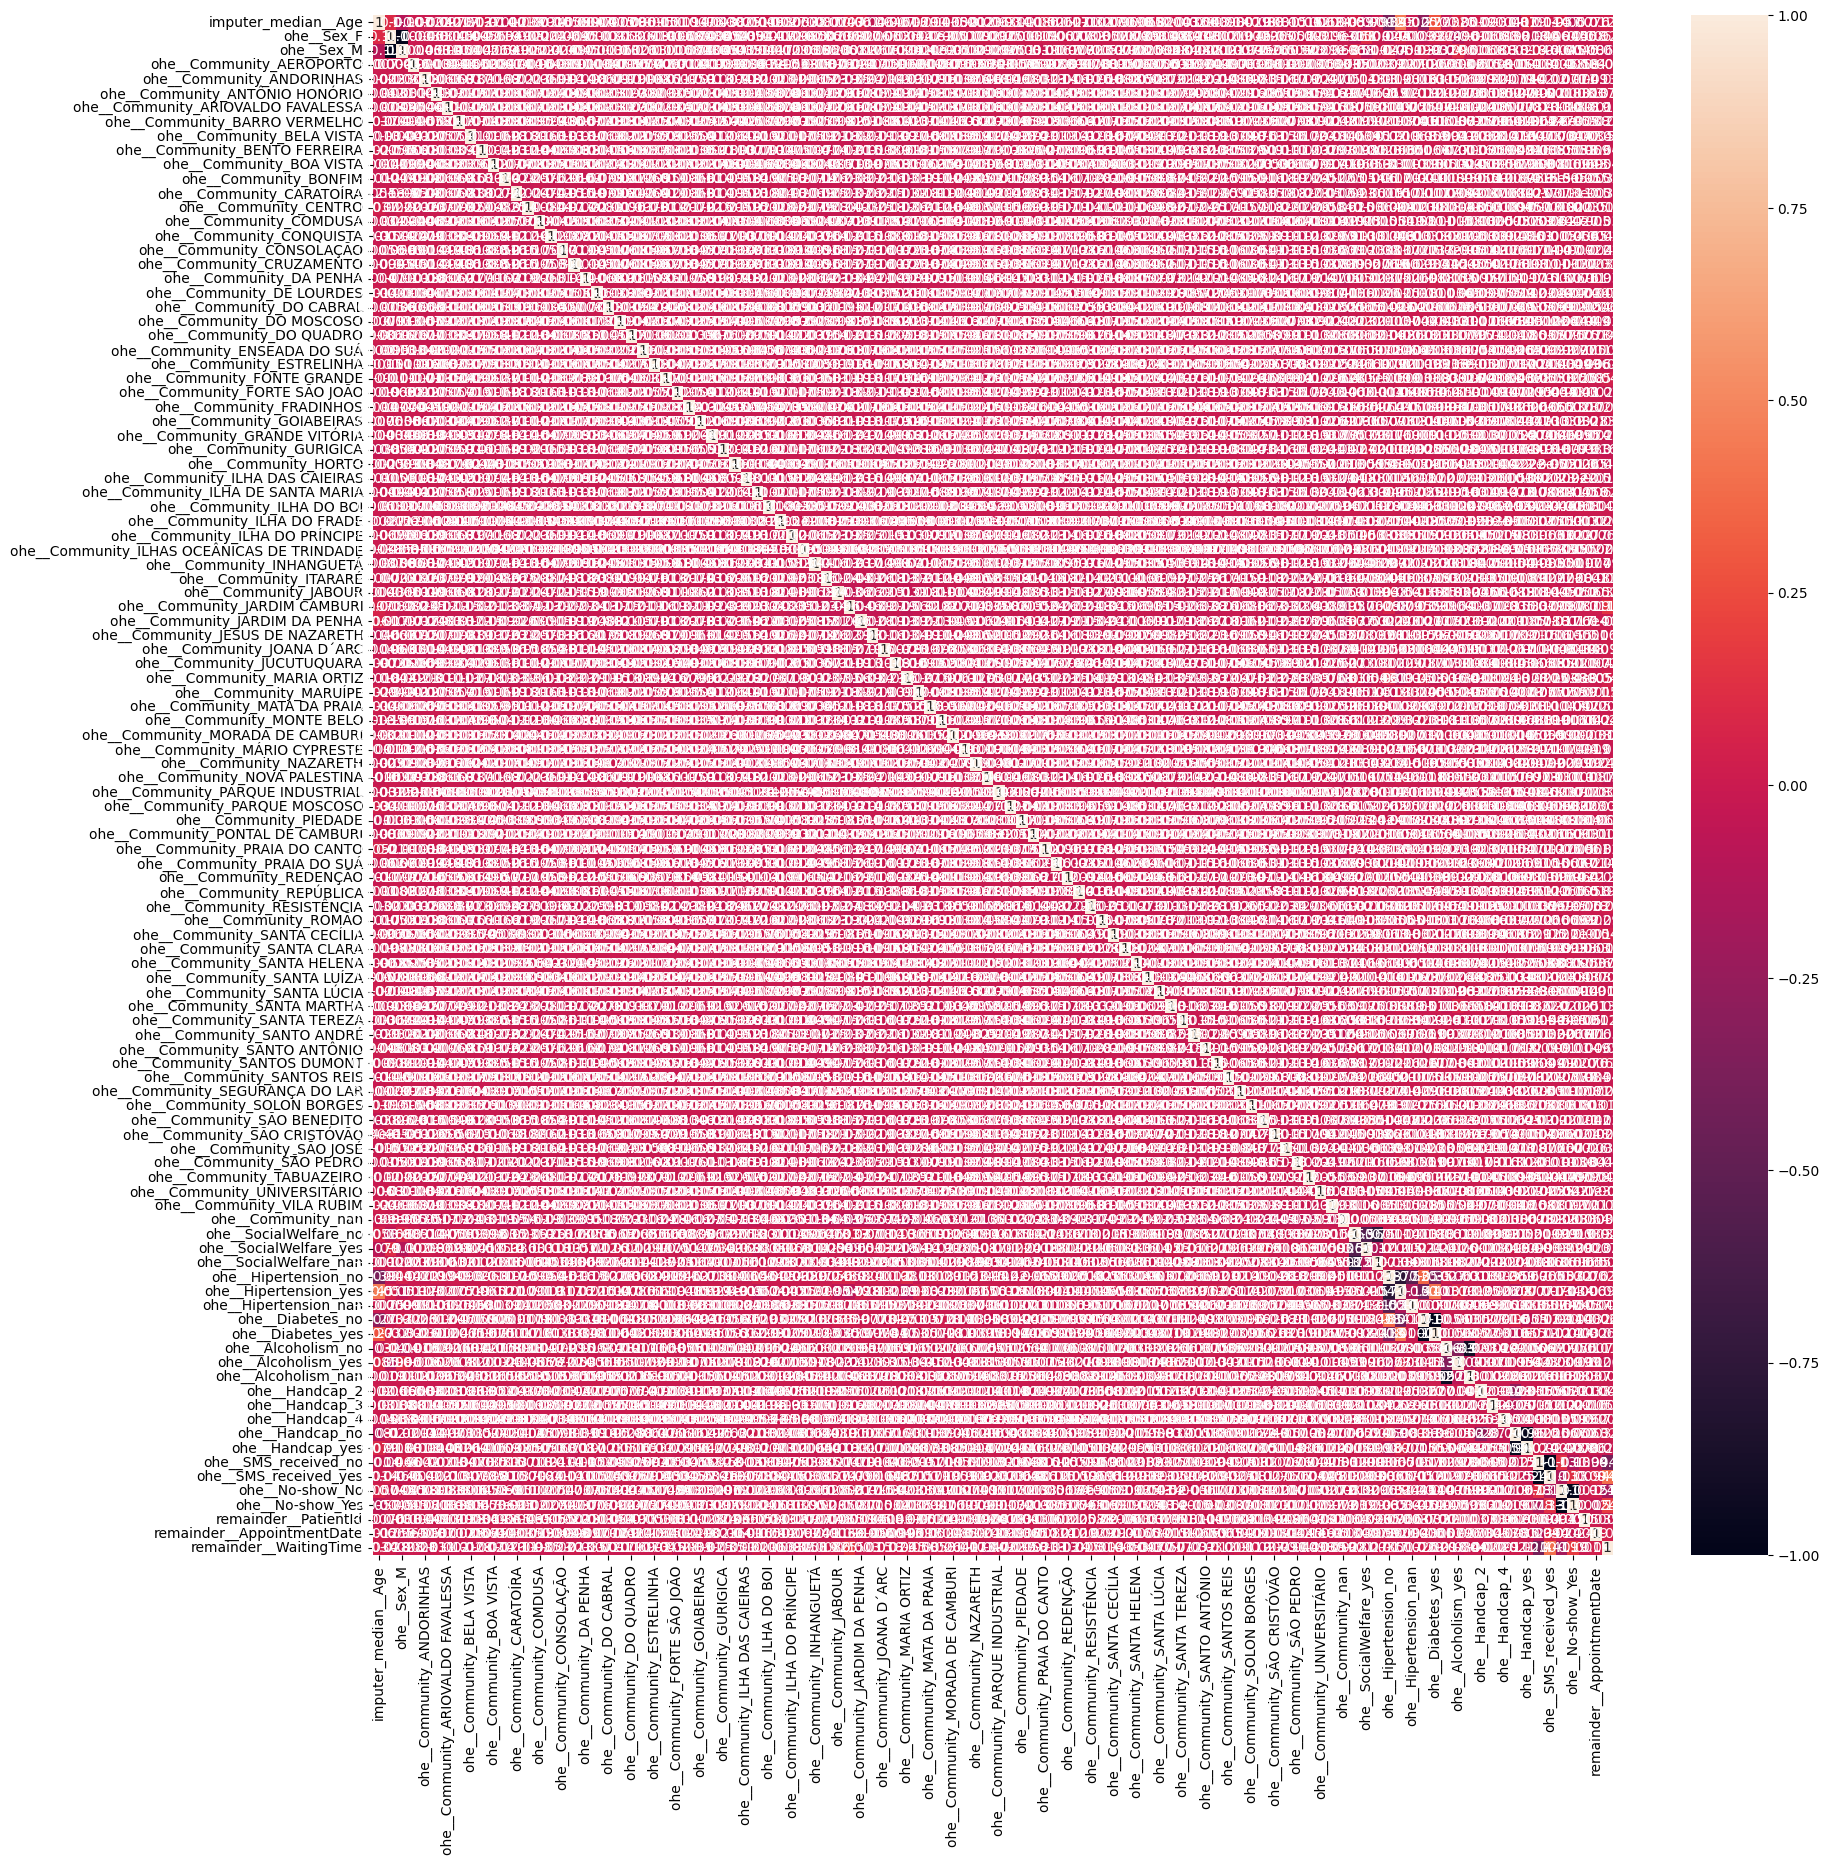

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# correlation matrix
cor = t_df_subset.corr()

plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=True)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from numpy import array 

In [ ]:
# Create training set and prediction target
X = t_df_subset_noshow.drop("remainder__No-show", axis=1)
y = t_df_subset_noshow[["remainder__No-show"]]
X = X[(X >= 0).all(axis=1)]
# Perform feature selection
# Set k to the number of features you want to identify
select = SelectKBest(score_func=chi2, k=10)
select.fit_transform(X,y)

# Print feature names
filter = select.get_support() 
features = array(X.columns)

print("All features:")
print(features)
 
print("Selected best 10:")
print(features[filter])

ValueError: Found input variables with inconsistent numbers of samples: [57529, 88421]